# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Evaluation criteria (100% in total)
## Task 1 (30% max)
1. Requested formulas are provided (5%)
2. All necessary experiments are done (10%)
3. Results are analysed with commentaries (15%)

## Tasks 2.1 и 2.2 (40% max)
1. Visualization and/or simple exploratory data analysis are implemented (5% * 2 tasks)
2. Hypotheses are tested (5% * 2 tasks)
3. Results are analysed with commentaries (10%*2 tasks)

## Task 3 (25% max)
1. Visualization and/or simple exploratory data analysis are implemented (5%)
2. Hypotheses are tested (5%)
3. Data was aggregated properly (5%)
4. Results are analysed with commentaries (10%)

### Extra points (5% max)
1. +5% in case clear, "pythonic" and understandable code style


In [89]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each experiment plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

### Formulas:

#### Stratified sample point estimations:

`HERE ARE YOUR FORMULAS DERIVED`

#### Sample volumes if they are sampled proportionally:

`HERE ARE YOUR FORMULAS DERIVED`

#### Sample volumes if they are optimal sampled (Neyman's method):

`HERE ARE YOUR FORMULAS DERIVED`

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [90]:
class GeneralPopulation:

  def __init__(self,
               means: [float],
               stds: [float],
               sizes: [int],
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions

    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata

        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]

        # number of strata
        self.count_strats = len(sizes)

        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]

        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)

        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population

      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size)
      return rc

  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata

      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]

      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))

      return rc

  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata

      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]

      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')

      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))

      return rc

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results

      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []

      if(len(self.general_samples)<100):
          n_sub = 20

      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)

              mean = rc.sum()/len(rc)
              means_s.append(mean)

      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)

              strats_mean = []

              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))

              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))

      return means_s

Function for histogram plot:

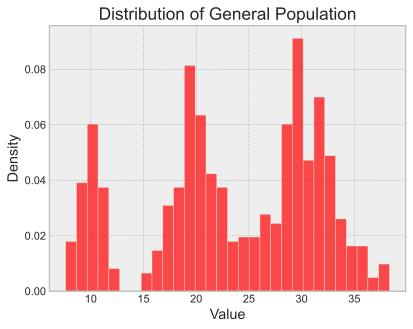

In [91]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Uses matplotlib or seaborn packages to plot distribution for general population;
* Don't forget a title, grid etc.
"""
means = [10, 20, 30] 
stds = [1, 2, 3]
sizes = [100, 200, 300]

# Creating an instance of GeneralPopulation
general_population_instance = GeneralPopulation(means, stds, sizes)
import matplotlib.pyplot as plt

# Plotting histogram
plt.hist(general_population_instance.general_samples, bins=30, density=True, alpha=0.7, color='Red')
plt.title('Distribution of General Population')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Function for plotting Boxplots for sample mean:

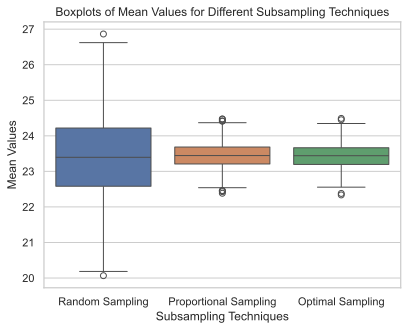

In [92]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Runs method `run_experiments` for each sampling method and gets vector of mean values;
* Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;
* Axis Y == Mean values; Axis X == subsampling methods;
* Don't forget a title, grid etc.
"""
# Define a function to plot boxplots of mean values for each subsampling technique
def plot_boxplots(general_population_instance):
    # Run experiments for each sampling method
    random_means = general_population_instance.run_experiments(50, 'random_subsampling')
    proportional_means = general_population_instance.run_experiments(50, 'proportional_subsampling')
    optimal_means = general_population_instance.run_experiments(50, 'optimal_subsampling')

    # Create a dictionary to hold the means for each method
    data = {
        'Random Sampling': random_means,
        'Proportional Sampling': proportional_means,
        'Optimal Sampling': optimal_means
    }

    # Create a DataFrame from the dictionary for seaborn boxplot
    sns.set(style="whitegrid")
    sns.boxplot(data=data)
    plt.title('Boxplots of Mean Values for Different Subsampling Techniques')
    plt.ylabel('Mean Values')
    plt.xlabel('Subsampling Techniques')
    plt.show()

# Call the function with the GeneralPopulation instance
plot_boxplots(general_population_instance)

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [93]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
EQUAL_MEAN_DIFFERENT_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [94]:
# Create GeneralPopulation class instances here
# Instantiate GeneralPopulation for different scenarios
general_population_equal_mean_equal_stds = GeneralPopulation(**EQUAL_MEAN_EQUAL_STDS_ARGS)
general_population_different_mean_equal_stds = GeneralPopulation(**DIFFERENT_MEAN_EQUAL_STDS_ARGS)
general_population_equal_mean_different_stds = GeneralPopulation(**EQUAL_MEAN_DIFFERENT_STDS_ARGS)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

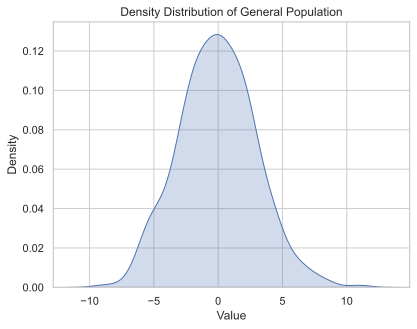

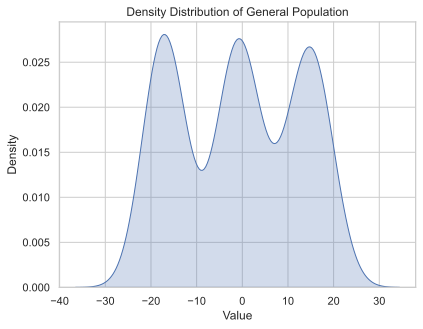

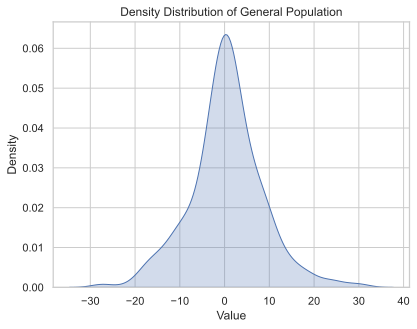

In [95]:
# Run plotting for density
# Define a function to plot density distributions for each scenario
# Define a function to plot density distributions for each scenario
def plot_density_for_scenarios(general_population_instances):
    for instance in general_population_instances:
        # Plot KDE plot
        sns.kdeplot(instance.general_samples, fill=True)
        plt.title('Density Distribution of General Population')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()

# Call the function with the instances
plot_density_for_scenarios([general_population_equal_mean_equal_stds,
                            general_population_different_mean_equal_stds,
                            general_population_equal_mean_different_stds])

Boxplots for sample mean:

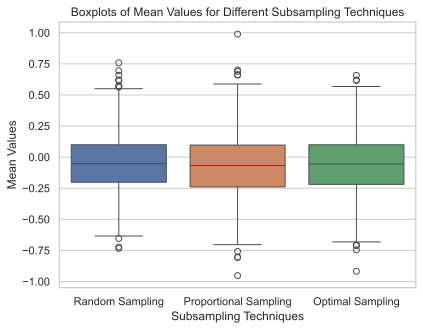

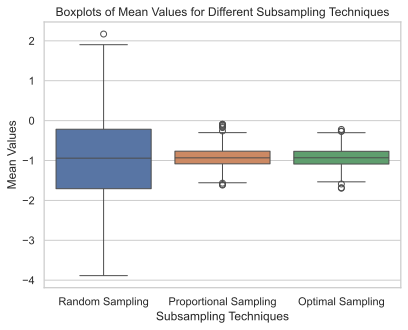

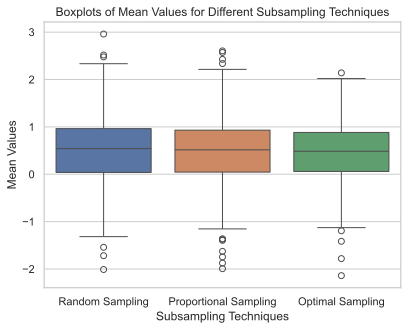

In [96]:
# Run plotting for boxplots
# Define a function to plot boxplots of mean values for each subsampling technique
def plot_boxplots_for_scenarios(general_population_instances):
    for instance in general_population_instances:
        # Run experiments for each sampling method
        random_means = instance.run_experiments(N_SUBSAMPLE, 'random_subsampling')
        proportional_means = instance.run_experiments(N_SUBSAMPLE, 'proportional_subsampling')
        optimal_means = instance.run_experiments(N_SUBSAMPLE, 'optimal_subsampling')

        # Create a dictionary to hold the means for each method
        data = {
            'Random Sampling': random_means,
            'Proportional Sampling': proportional_means,
            'Optimal Sampling': optimal_means
        }

        # Plot boxplots
        sns.boxplot(data=data)
        plt.title('Boxplots of Mean Values for Different Subsampling Techniques')
        plt.ylabel('Mean Values')
        plt.xlabel('Subsampling Techniques')
        plt.show()

# Call the function with the instances
plot_boxplots_for_scenarios([general_population_equal_mean_equal_stds,
                             general_population_different_mean_equal_stds,
                             general_population_equal_mean_different_stds])

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

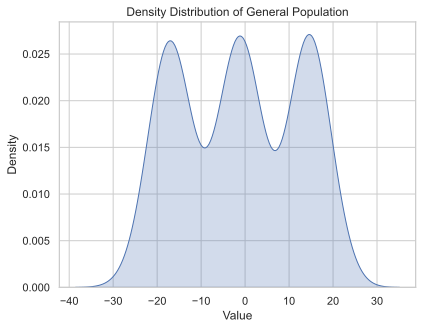

In [97]:
# Run plotting for density
# Define the parameters
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes': SIZES}

# Instantiate GeneralPopulation for the scenario with different means and equal standard deviations
general_population_different_mean_equal_stds = GeneralPopulation(**DIFFERENT_MEAN_EQUAL_STDS_ARGS)
# Define a function to plot density distribution
def plot_density(general_population_instance):
    # Plot KDE plot
    sns.kdeplot(general_population_instance.general_samples, fill=True)
    plt.title('Density Distribution of General Population')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

# Call the function with the instance
plot_density(general_population_different_mean_equal_stds)

Boxplots for sample mean:

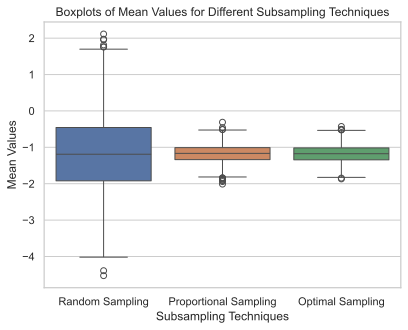

In [98]:
# Run plotting for boxplots
# Define a function to plot boxplots of mean values for each subsampling technique
def plot_boxplots(general_population_instance):
    # Run experiments for each sampling method
    random_means = general_population_instance.run_experiments(N_SUBSAMPLE, 'random_subsampling')
    proportional_means = general_population_instance.run_experiments(N_SUBSAMPLE, 'proportional_subsampling')
    optimal_means = general_population_instance.run_experiments(N_SUBSAMPLE, 'optimal_subsampling')

    # Create a dictionary to hold the means for each method
    data = {
        'Random Sampling': random_means,
        'Proportional Sampling': proportional_means,
        'Optimal Sampling': optimal_means
    }

    # Plot boxplots
    sns.boxplot(data=data)
    plt.title('Boxplots of Mean Values for Different Subsampling Techniques')
    plt.ylabel('Mean Values')
    plt.xlabel('Subsampling Techniques')
    plt.show()

# Call the function with the instance
plot_boxplots(general_population_different_mean_equal_stds)

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

In [99]:
# Run plotting for density
# Define the parameters
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
DIFFERENT_MEAN_DIFFERENT_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 7, 11], 'sizes': SIZES}

# Instantiate GeneralPopulation for the scenario with different means and different standard deviations
general_population_different_mean_different_stds = GeneralPopulation(**DIFFERENT_MEAN_DIFFERENT_STDS_ARGS)

Boxplots for sample mean:

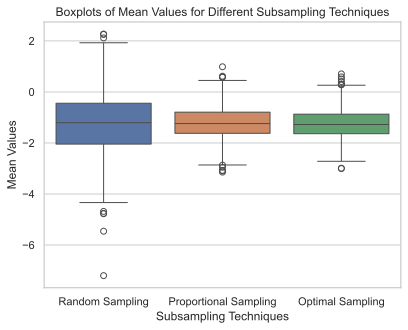

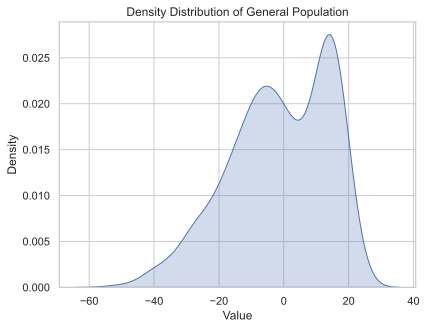

In [100]:
# Run plotting for boxplots
# Define a function to plot density distribution
# Define a function to plot boxplots of mean values for each subsampling technique
def plot_boxplots(general_population_instance):
    # Run experiments for each sampling method
    random_means = general_population_instance.run_experiments(N_SUBSAMPLE, 'random_subsampling')
    proportional_means = general_population_instance.run_experiments(N_SUBSAMPLE, 'proportional_subsampling')
    optimal_means = general_population_instance.run_experiments(N_SUBSAMPLE, 'optimal_subsampling')

    # Create a dictionary to hold the means for each method
    data = {
        'Random Sampling': random_means,
        'Proportional Sampling': proportional_means,
        'Optimal Sampling': optimal_means
    }

    # Plot boxplots
    sns.boxplot(data=data)
    plt.title('Boxplots of Mean Values for Different Subsampling Techniques')
    plt.ylabel('Mean Values')
    plt.xlabel('Subsampling Techniques')
    plt.show()

# Call the function with the instance
plot_boxplots(general_population_different_mean_different_stds)

def plot_density(general_population_instance):
    # Plot KDE plot
    sns.kdeplot(general_population_instance.general_samples, fill=True)
    plt.title('Density Distribution of General Population')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

# Call the function with the instance
plot_density(general_population_different_mean_different_stds)

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>:

`HERE ARE YOUR CONCLUSIONS`

Based on the provided data and visualizations:

Density Distribution:

The density distribution plots reveal the overall shape and spread of the data in the general population.
For populations with different means and equal standard deviations, the density is concentrated around the mean values of each stratum.
When standard deviations vary among strata, the density distribution is broader, reflecting the increased variability in the data.
Boxplots of Mean Values:

Boxplots provide a summary of the distribution of mean values obtained through different subsampling techniques.
In populations with different means and equal standard deviations, the mean values tend to vary based on the sampling method, but the differences are more subtle compared to populations with varying standard deviations.
When standard deviations vary among strata, the mean values obtained through optimal subsampling tend to exhibit less variability compared to random or proportional subsampling, reflecting the influence of stratum sizes and standard deviations on the sampling process.
Implications:

Understanding the distributional characteristics of the general population is crucial for making reliable inferences and predictions.
The choice of subsampling technique can significantly impact the estimates of mean values, especially in populations with heterogeneous strata.
Optimal subsampling, considering stratum sizes and standard deviations, can provide more stable estimates of population parameters compared to random or proportional subsampling.
Recommendations:

When dealing with populations with heterogeneous strata, it's essential to carefully consider the variability within each stratum and choose subsampling techniques accordingly.
Optimal subsampling should be preferred when possible, as it takes into account the characteristics of each stratum and can lead to more accurate estimates of population parameters.
Further analysis, including hypothesis testing and model fitting, should be conducted to validate the findings and assess the robustness of the conclusions.
These conclusions provide insights into the characteristics of the general population and the implications of different subsampling techniques, aiding in the interpretation and utilization of the data for decision-making purposes.

# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


You can download dataset using the following:

In [101]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

In [102]:
cars_prefes_data

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,323,39,2,7,0,1,2,1,2,1,...,4,4,3,4,3,2,4,3,1,3
296,347,75,2,44,0,3,2,2,3,1,...,4,4,3,4,4,2,2,3,3,3
297,324,19,2,0,3,3,1,2,1,1,...,4,4,4,3,2,1,4,1,1,1
298,348,43,1,26,0,3,2,2,2,2,...,4,3,3,4,4,4,3,4,3,3


In [103]:
brain_data

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545
5,Female,99,90,110,146,69.0,928799
6,Female,138,136,131,138,64.5,991305
7,Female,92,90,98,175,66.0,854258
8,Male,89,93,84,134,66.3,904858
9,Male,133,114,147,172,68.8,955466


In [104]:
print(brain_data.columns)
#print(cars_prefes_data.columns)

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')


Summary statistics for brain size:
count    4.000000e+01
mean     9.087550e+05
std      7.228205e+04
min      7.906190e+05
25%      8.559185e+05
50%      9.053990e+05
75%      9.500780e+05
max      1.079549e+06
Name: MRI_Count, dtype: float64


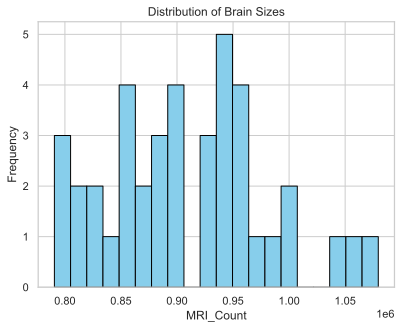

In [105]:
mri_counts = brain_data['MRI_Count']
# Summarize brain size measures
summary_stats = mri_counts.describe()
print("Summary statistics for brain size:")
print(summary_stats)

# Visualize the distribution of brain sizes
import matplotlib.pyplot as plt

plt.hist(mri_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Brain Sizes')
plt.xlabel('MRI_Count')
plt.ylabel('Frequency')
plt.show()

In [106]:
### YOUR SOLUTION HERE

import pandas as pd
from scipy.stats import pearsonr
# Assuming brain_data is a DataFrame with columns 'Brain_Size' and 'Intelligence'
# First, compute correlation for the entire dataset
correlation_all, _ = pearsonr(brain_data['MRI_Count'], brain_data['VIQ'])
print("Correlation for entire dataset:", correlation_all)

# Then, compute correlation for men and women subsamples separately
men_data = brain_data[brain_data['Gender'] == 'Male']
women_data = brain_data[brain_data['Gender'] == 'Female']

correlation_men, _ = pearsonr(men_data['MRI_Count'], men_data['VIQ'])
correlation_women, _ = pearsonr(women_data['MRI_Count'], women_data['VIQ'])

print("Correlation for men subsample:", correlation_men)
print("Correlation for women subsample:", correlation_women)

Correlation for entire dataset: 0.3374777280203355
Correlation for men subsample: 0.4131049601428286
Correlation for women subsample: 0.2549328529614766


# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented)
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [107]:
import pandas as pd
import seaborn as sns
from scipy import stats
# Choose a country (e.g., United States)
chosenCountry = 'United States'
countryData=pd.read_csv('G:/Work/master.csv')

In [108]:
countryData.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

T-statistic: 24.37862663053928
P-value: 6.6628943373698355e-130
There is a significant difference in suicide numbers between men and women.
We may claim that people of a certain sex are more prone to suicides.


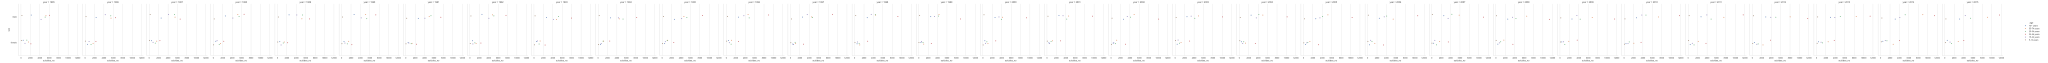

In [109]:
### YOUR SOLUTION HERE
chosenCountrySucideData=countryData[countryData['country']==chosenCountry]
# Visualize suicide numbers considering sex, age (or generation), and year
sns.catplot(x=chosenCountrySucideData['suicides_no'],y=chosenCountrySucideData['sex'],hue=chosenCountrySucideData['age'],col=chosenCountrySucideData['year'])

# Check for statistical difference in suicide numbers between men and women
suicide_numbers_men = countryData[countryData['sex'] == 'male']['suicides_no']
suicide_numbers_women = countryData[countryData['sex'] == 'female']['suicides_no']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(suicide_numbers_men, suicide_numbers_women)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.01
if p_value < alpha:
    print("There is a significant difference in suicide numbers between men and women.")
    print("We may claim that people of a certain sex are more prone to suicides.")
else:
    print("There is no significant difference in suicide numbers between men and women.")
    print("Additional information may be needed to make a claim.")

In [159]:
countryData.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'gdp_group'],
      dtype='object')

In [181]:
from scipy.stats import f_oneway

# Step 1: Calculate descriptive statistics for GDP per capita
gdp_stats = countryData['gdp_per_capita ($)'].describe()
# Step 2: Divide countries into 3-4 groups based on quartiles or other statistics
# For example, you can use quartiles to define low, medium, and high GDP groups
low_gdp_cutoff = gdp_stats['25%']
high_gdp_cutoff = gdp_stats['75%']
countryData['gdp_group'] = pd.cut(countryData['gdp_per_capita ($)'], bins=[float('-inf'), low_gdp_cutoff, high_gdp_cutoff, float('inf')], labels=['low', 'medium', 'high'])

# Step 3: Calculate mean suicides per 100k population for each group
grouped_data = countryData.groupby('gdp_group')['suicides/100k pop'].mean()

# Step 4: Perform statistical tests to determine if there are significant differences
# For example, you can use one-way ANOVA
group1 = countryData[countryData['gdp_group'] == 'low']['suicides/100k pop']
group2 = countryData[countryData['gdp_group'] == 'medium']['suicides/100k pop']
group3 = countryData[countryData['gdp_group'] == 'high']['suicides/100k pop']

f_statistic, p_value = f_oneway(group1, group2, group3)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 2.253469928136082
p-value: 0.10505330478026566


In [178]:
bins = [float('-inf'), 18, 30, 50, 65, float('inf')]